In [1]:
%load_ext autoreload
%autoreload 2

from ryn.common import helper
helper.notebook()

changing directory


In [7]:
from ryn.graphs import split
from ryn.graphs import loader

g = loader.load_graphs_from_uri('cde.m_en-trainvalidtest')[0]
print(f'loaded {g.str_stats}')

rels = split.Relation.from_graph(g)
rels.sort(key=lambda rel: rel.ratio)
print(f'retrieved {len(rels)} relations')

loaded ryn graph: cde.m_en-trainvalidtest
  nodes: 17050
  edges: 206205 (51 types)
  degree:
    mean 24.19
    median 13

retrieved 51 relations


In [8]:
from tabulate import tabulate

rows = [(i, r.r, r.ratio, len(r.hs), len(r.ts), r.name) for i, r in enumerate(rels, 1)]

N = 10

print(f'first {N}')
print(tabulate(rows[:N]))

# print(f'mid {N}')
# m = len(rows) / 2
# print(tabulate(rows[int(m-N/2):int(m+N/2)]))

# print(f'last {N}')
# print(tabulate(rows[-N:]))

first 10
--  --  ----------  -----  ---  ------------------------------------------
 1  11  0.00631622   9816   62  P1412:languages spoken, written, or signed
 2  14  0.0104914    3622   38  P1303:instrument
 3  25  0.015873     2520   40  P140:religion
 4   3  0.0168763   13036  220  P27:country of citizenship
 5  19  0.01983       353    7  P30:continent
 6   8  0.0201889    3071   62  P509:cause of death
 7   5  0.0248385    2013   50  P172:ethnic group
 8  41  0.0263158     152    4  P2348:time period
 9  20  0.0275862    2175   60  P102:member of political party
10   2  0.028528    13145  375  P106:occupation
--  --  ----------  -----  ---  ------------------------------------------


In [10]:
N, M = 150, 5

whitelist = set()

gen = rels[:N]
# gen = [r for r in rels if r.name in whitelist]

for i, r in enumerate(gen, 1):
    print(f'\n{i=} {r.ratio:2.4f} {r.name[:100]}')
    ents = r.hs if len(r.hs) < len(r.ts) else r.ts
    for e in list(ents)[:M]:
        print('    ', g.source.ents[e])


i=1 0.0063 P1412:languages spoken, written, or signed
     Q1617:Urdu
     Q9168:Persian
     Q9301:Serbo-Croatian
     Q9035:Danish
     Q9091:Belarusian

i=2 0.0105 P1303:instrument
     Q9798:saxophone
     Q8350:trombone
     Q1343007:electronic keyboard
     Q11404:drum
     Q3382191:upright piano

i=3 0.0159 P140:religion
     Q9585:Shia Islam
     Q170208:Religious Society of Friends
     Q678551:American Jews
     Q188814:Serbian Orthodox Church
     Q13211738:atheist

i=4 0.0169 P27:country of citizenship
     Q974:Democratic Republic of the Congo
     Q1041:Senegal
     Q79:Egypt
     Q23366230:Republic of Geneva
     Q298:Chile

i=5 0.0198 P30:continent
     Q18:South America
     Q538:Oceania
     Q49:North America
     Q5401:Eurasia
     Q48:Asia

i=6 0.0202 P509:cause of death
     Q47912:lung cancer
     Q181257:prostate cancer
     Q41083:syphilis
     Q178275:1918-1920 flu pandemic
     Q14467705:surgical complications

i=7 0.0248 P172:ethnic group
     Q161652:Japane

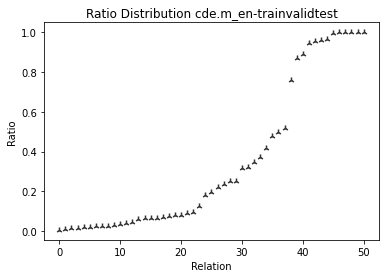

In [16]:
import ryn
from ryn.common import plotter

path = ryn.ENV.SPLIT_DIR / f'{g.name}.ratio'
path.parent.mkdir(exist_ok=True, parents=True)

plt = plotter.Plotter(title=f'Ratio Distribution {g.name}', xlabel='Relation', ylabel='Ratio', fname=str(path))
plt.ax.scatter(range(len(rels)), [r.ratio for r in rels], color=plotter.CLR[0], marker="2")
#plt.ax.vlines(100, 0, 1, color=plotter.CLR[0], linestyle='dotted')

print()
plt.plot()
print()